In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.externals import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import glob
import scipy
import cv2 as cv

/usr/share/anaconda3/envs/nepali-handwriting/lib/python2.7/site-packages/h5py/__init__.py:36: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._conv import register_converters as _register_converters
/usr/share/anaconda3/envs/nepali-handwriting/lib/python2.7/site-packages/h5py/__init__.py:45: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import h5a, h5d, h5ds, h5f, h5fd, h5g, h5r, h5s, h5t, h5p, h5z
/usr/share/anaconda3/envs/nepali-handwriting/lib/python2.7/site-packages/h5py/_hl/group.py:22: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .. import h5g, h5i, h5o, h5r, h5t, h5l, h5p
Using TensorFlow backend.
/usr/share/anaconda3/envs/nepali-handwriting/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from

In [2]:
our_own_dataset = []

# load the png image data
for image_file_name in glob.glob('nepali_characters/*/*/*.jpg'):
    # use the filename to set the correct label
    label = int(image_file_name[-14:-11])
    
    # load image data from png files into an array
    print ("loading ... ", image_file_name)
    img_array = cv.imread(image_file_name, 0)  #Read an image from a file as an array
    (thresh, image_array) = cv.threshold(img_array, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
    # reshape from 28x28 to list of 784 values, invert values
 #   img_data  = (255.0 - img_array.reshape(784))/255.0
    
    # then scale data to range from 0.01 to 1.0
#     img_data = (img_data / 255.0 * 0.99) + 0.01
#     print(np.min(img_data))
#     print(np.max(img_data))
    
    # append label and image data  to test data set
    record = np.append(label,image_array)
    our_own_dataset.append(record)

loading ...  nepali_characters/03_consonants/050/044_02.jpg
loading ...  nepali_characters/03_consonants/050/012_04.jpg
loading ...  nepali_characters/03_consonants/050/010_04.jpg
loading ...  nepali_characters/03_consonants/050/019_03.jpg
loading ...  nepali_characters/03_consonants/050/004_06.jpg
loading ...  nepali_characters/03_consonants/050/037_02.jpg
loading ...  nepali_characters/03_consonants/050/008_03.jpg
loading ...  nepali_characters/03_consonants/050/001_12.jpg
loading ...  nepali_characters/03_consonants/050/027_02.jpg
loading ...  nepali_characters/03_consonants/050/018_02.jpg
loading ...  nepali_characters/03_consonants/050/017_07.jpg
loading ...  nepali_characters/03_consonants/050/014_07.jpg
loading ...  nepali_characters/03_consonants/050/043_02.jpg
loading ...  nepali_characters/03_consonants/050/005_05.jpg
loading ...  nepali_characters/03_consonants/050/006_03.jpg
loading ...  nepali_characters/03_consonants/050/013_01.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/031/011_10.jpg
loading ...  nepali_characters/03_consonants/031/006_02.jpg
loading ...  nepali_characters/03_consonants/031/008_02.jpg
loading ...  nepali_characters/03_consonants/031/015_03.jpg
loading ...  nepali_characters/03_consonants/031/042_01.jpg
loading ...  nepali_characters/03_consonants/031/002_02.jpg
loading ...  nepali_characters/03_consonants/031/004_03.jpg
loading ...  nepali_characters/03_consonants/031/015_10.jpg
loading ...  nepali_characters/03_consonants/031/001_13.jpg
loading ...  nepali_characters/03_consonants/031/034_01.jpg
loading ...  nepali_characters/03_consonants/031/020_08.jpg
loading ...  nepali_characters/03_consonants/031/011_09.jpg
loading ...  nepali_characters/03_consonants/031/024_02.jpg
loading ...  nepali_characters/03_consonants/031/001_05.jpg
loading ...  nepali_characters/03_consonants/031/015_05.jpg
loading ...  nepali_characters/03_consonants/031/001_17.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/054/001_09.jpg
loading ...  nepali_characters/03_consonants/054/011_10.jpg
loading ...  nepali_characters/03_consonants/054/006_02.jpg
loading ...  nepali_characters/03_consonants/054/008_02.jpg
loading ...  nepali_characters/03_consonants/054/015_03.jpg
loading ...  nepali_characters/03_consonants/054/042_01.jpg
loading ...  nepali_characters/03_consonants/054/002_02.jpg
loading ...  nepali_characters/03_consonants/054/004_03.jpg
loading ...  nepali_characters/03_consonants/054/015_10.jpg
loading ...  nepali_characters/03_consonants/054/001_13.jpg
loading ...  nepali_characters/03_consonants/054/034_01.jpg
loading ...  nepali_characters/03_consonants/054/020_08.jpg
loading ...  nepali_characters/03_consonants/054/011_09.jpg
loading ...  nepali_characters/03_consonants/054/024_02.jpg
loading ...  nepali_characters/03_consonants/054/001_05.jpg
loading ...  nepali_characters/03_consonants/054/015_05.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/034/040_02.jpg
loading ...  nepali_characters/03_consonants/034/005_02.jpg
loading ...  nepali_characters/03_consonants/034/020_10.jpg
loading ...  nepali_characters/03_consonants/034/001_10.jpg
loading ...  nepali_characters/03_consonants/034/012_05.jpg
loading ...  nepali_characters/03_consonants/034/015_06.jpg
loading ...  nepali_characters/03_consonants/034/034_02.jpg
loading ...  nepali_characters/03_consonants/034/025_01.jpg
loading ...  nepali_characters/03_consonants/034/010_06.jpg
loading ...  nepali_characters/03_consonants/034/001_14.jpg
loading ...  nepali_characters/03_consonants/034/004_02.jpg
loading ...  nepali_characters/03_consonants/034/010_09.jpg
loading ...  nepali_characters/03_consonants/034/005_04.jpg
loading ...  nepali_characters/03_consonants/034/038_02.jpg
loading ...  nepali_characters/03_consonants/034/045_01.jpg
loading ...  nepali_characters/03_consonants/034/006_01.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/038/012_03.jpg
loading ...  nepali_characters/03_consonants/038/014_09.jpg
loading ...  nepali_characters/03_consonants/038/039_02.jpg
loading ...  nepali_characters/03_consonants/038/023_01.jpg
loading ...  nepali_characters/03_consonants/038/007_03.jpg
loading ...  nepali_characters/03_consonants/038/045_02.jpg
loading ...  nepali_characters/03_consonants/038/043_01.jpg
loading ...  nepali_characters/03_consonants/038/013_06.jpg
loading ...  nepali_characters/03_consonants/038/018_07.jpg
loading ...  nepali_characters/03_consonants/038/008_05.jpg
loading ...  nepali_characters/03_consonants/038/014_10.jpg
loading ...  nepali_characters/03_consonants/038/018_03.jpg
loading ...  nepali_characters/03_consonants/038/020_07.jpg
loading ...  nepali_characters/03_consonants/038/018_06.jpg
loading ...  nepali_characters/03_consonants/038/017_06.jpg
loading ...  nepali_characters/03_consonants/038/002_10.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/01_numerals/009/016_05.jpg
loading ...  nepali_characters/01_numerals/009/012_08.jpg
loading ...  nepali_characters/01_numerals/009/014_10.jpg
loading ...  nepali_characters/01_numerals/009/001_21.jpg
loading ...  nepali_characters/01_numerals/009/012_13.jpg
loading ...  nepali_characters/01_numerals/009/018_03.jpg
loading ...  nepali_characters/01_numerals/009/020_07.jpg
loading ...  nepali_characters/01_numerals/009/013_10.jpg
loading ...  nepali_characters/01_numerals/009/018_06.jpg
loading ...  nepali_characters/01_numerals/009/017_06.jpg
loading ...  nepali_characters/01_numerals/009/007_07.jpg
loading ...  nepali_characters/01_numerals/009/002_10.jpg
loading ...  nepali_characters/01_numerals/009/037_01.jpg
loading ...  nepali_characters/01_numerals/009/005_12.jpg
loading ...  nepali_characters/01_numerals/009/014_04.jpg
loading ...  nepali_characters/01_numerals/009/022_02.jpg
loading ...  nepali_characters/01_numerals/009/039_03.jpg
loading ...  n

loading ...  nepali_characters/02_vowels/010/004_03.jpg
loading ...  nepali_characters/02_vowels/010/015_10.jpg
loading ...  nepali_characters/02_vowels/010/001_26.jpg
loading ...  nepali_characters/02_vowels/010/019_06.jpg
loading ...  nepali_characters/02_vowels/010/001_13.jpg
loading ...  nepali_characters/02_vowels/010/034_01.jpg
loading ...  nepali_characters/02_vowels/010/020_08.jpg
loading ...  nepali_characters/02_vowels/010/011_09.jpg
loading ...  nepali_characters/02_vowels/010/024_02.jpg
loading ...  nepali_characters/02_vowels/010/001_05.jpg
loading ...  nepali_characters/02_vowels/010/015_05.jpg
loading ...  nepali_characters/02_vowels/010/001_17.jpg
loading ...  nepali_characters/02_vowels/010/019_07.jpg
loading ...  nepali_characters/02_vowels/010/004_04.jpg
loading ...  nepali_characters/02_vowels/010/001_01.jpg
loading ...  nepali_characters/02_vowels/010/001_19.jpg
loading ...  nepali_characters/02_vowels/010/010_08.jpg
loading ...  nepali_characters/02_vowels/010/008

loading ...  nepali_characters/02_vowels/012/032_01.jpg
loading ...  nepali_characters/02_vowels/012/046_02.jpg
loading ...  nepali_characters/02_vowels/012/015_09.jpg
loading ...  nepali_characters/02_vowels/012/018_09.jpg
loading ...  nepali_characters/02_vowels/012/010_05.jpg
loading ...  nepali_characters/02_vowels/012/020_05.jpg
loading ...  nepali_characters/02_vowels/012/007_04.jpg
loading ...  nepali_characters/02_vowels/011/044_02.jpg
loading ...  nepali_characters/02_vowels/011/012_04.jpg
loading ...  nepali_characters/02_vowels/011/010_04.jpg
loading ...  nepali_characters/02_vowels/011/019_03.jpg
loading ...  nepali_characters/02_vowels/011/004_06.jpg
loading ...  nepali_characters/02_vowels/011/037_02.jpg
loading ...  nepali_characters/02_vowels/011/008_03.jpg
loading ...  nepali_characters/02_vowels/011/001_12.jpg
loading ...  nepali_characters/02_vowels/011/027_02.jpg
loading ...  nepali_characters/02_vowels/011/018_02.jpg
loading ...  nepali_characters/02_vowels/011/017

In [3]:
data = np.array(our_own_dataset)
np.random.shuffle(data)
xx = pd.DataFrame(data)

In [4]:
xx.tail()

,0,1,2,3,4,5,6,7,8,9,...,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296
12907,12,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
12908,19,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
12909,20,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
12910,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
12911,46,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [5]:
x = np.array(xx)
X = x[:,1:]
y = x[:,0]

In [6]:
x.shape

(12912, 1297)

In [7]:
# X = data_pd.iloc[:,1:]
# y = data_pd.iloc[:,0:1].values
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,stratify = y)

In [8]:
# X_train = X_train.reshape(X_train.shape[0], 1, 36, 36).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], 1, 36, 36).astype('float32')
img_rows = img_cols = 36
X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 1)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 1)

In [9]:
# if K.image_data_format() == 'channels_first':
#     x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#     x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)

# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255
# print('x_train shape:', x_train.shape)
# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')

# # convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (10329, 36, 36, 1)
y_train shape (10329,)
X_test shape (2583, 36, 36, 1)
y_test shape (2583,)
Train matrix shape (10329, 36, 36, 1)
Test matrix shape (2583, 36, 36, 1)


In [10]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 58
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (10329,)
Shape after one-hot encoding:  (10329, 58)


In [11]:
# model = Sequential()
# model.add(Dense(256, input_shape=(1296,)))
# model.add(Activation('relu'))                            
# model.add(Dropout(0.2))

# model.add(Dense(192))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

# model.add(Dense(58))
# model.add(Activation('softmax'))

# define the larger model
def larger_model():
# create model
    model = Sequential()
    model.add(Conv2D(10, (5, 5), strides=(1,1), input_shape=(36, 36, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(20, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(58, activation='softmax'))
    # Compile model

#     model.add(Conv2D(72, kernel_size=(5, 5), strides=(1, 1),activation='relu',input_shape=(36,36,1)))
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
#     model.add(Conv2D(64, (5, 5), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
    
#     model.add(Flatten())
#     model.add(Dense(1000, activation='relu'))
#     model.add(Dense(58, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [12]:
# build the model
model = larger_model()

In [13]:
# model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Train on 10329 samples, validate on 2583 samples
Epoch 1/30
 - 3s - loss: 3.7720 - acc: 0.0989 - val_loss: 2.7938 - val_acc: 0.3120
Epoch 2/30
 - 3s - loss: 2.1318 - acc: 0.4318 - val_loss: 1.5199 - val_acc: 0.5846
Epoch 3/30
 - 3s - loss: 1.3687 - acc: 0.6067 - val_loss: 1.1000 - val_acc: 0.6825
Epoch 4/30
 - 3s - loss: 1.0374 - acc: 0.6923 - val_loss: 0.8725 - val_acc: 0.7549
Epoch 5/30
 - 3s - loss: 0.8414 - acc: 0.7470 - val_loss: 0.7363 - val_acc: 0.7859
Epoch 6/30
 - 3s - loss: 0.7336 - acc: 0.7768 - val_loss: 0.6724 - val_acc: 0.8045
Epoch 7/30
 - 3s - loss: 0.6402 - acc: 0.8027 - val_loss: 0.6327 - val_acc: 0.8250
Epoch 8/30
 - 3s - loss: 0.5886 - acc: 0.8175 - val_loss: 0.5525 - val_acc: 0.8393
Epoch 9/30
 - 3s - loss: 0.5274 - acc: 0.8385 - val_loss: 0.5366 - val_acc: 0.8424
Epoch 10/30
 - 3s - loss: 0.4852 - acc: 0.8501 - val_loss: 0.5169 - val_acc: 0.8509
Epoch 11/30
 - 3s - loss: 0.4444 - acc: 0.8613 - val_loss: 0.4817 - val_acc: 0.8602
Epoch 12/30
 - 3s - loss: 0.4091 - a

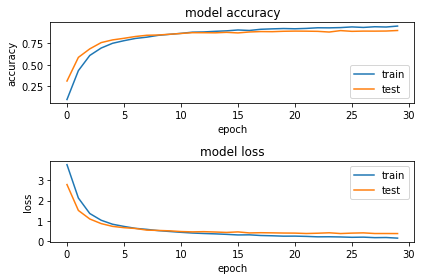

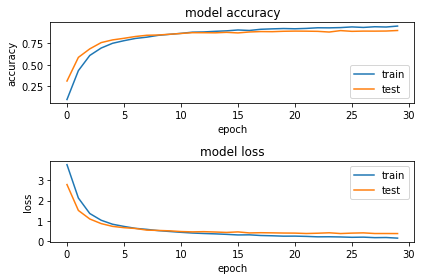

In [14]:
history = model.fit(X_train, Y_train,
          batch_size=100, epochs=30,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
save_dir = "./"
model_name = 'model_cnn.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

# 

In [15]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

#get the indices to be plotted
correct = np.nonzero(predicted_classes==y_test)[0]
incorrect = np.nonzero(predicted_classes!=y_test)[0]

In [16]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(58)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.98      0.96      0.97        57
    Class 1       1.00      1.00      1.00        58
    Class 2       0.86      0.95      0.90        58
    Class 3       0.93      0.95      0.94        58
    Class 4       0.98      0.98      0.98        58
    Class 5       0.98      0.97      0.97        58
    Class 6       0.96      0.93      0.95        58
    Class 7       0.97      0.98      0.97        58
    Class 8       0.92      1.00      0.96        58
    Class 9       0.97      0.97      0.97        58
   Class 10       1.00      0.86      0.93        44
   Class 11       0.90      1.00      0.95        44
   Class 12       0.89      0.89      0.89        44
   Class 13       0.98      0.98      0.98        44
   Class 14       0.84      0.86      0.85        44
   Class 15       0.98      0.93      0.95        44
   Class 16       0.93      0.86      0.89        44
   Class 17       0.95      0.95      0.95   

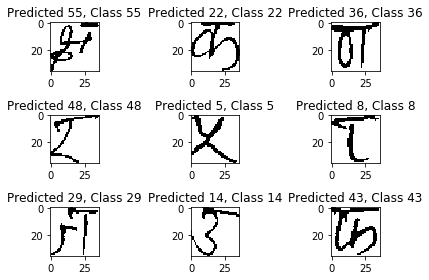

In [17]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(36,36), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

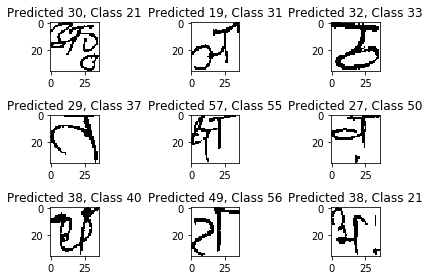

In [18]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(36,36), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()

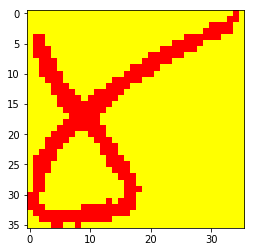

In [19]:
test_im = X_train[154]
plt.imshow(test_im.reshape(36,36), cmap='autumn', interpolation='none')
plt.show()